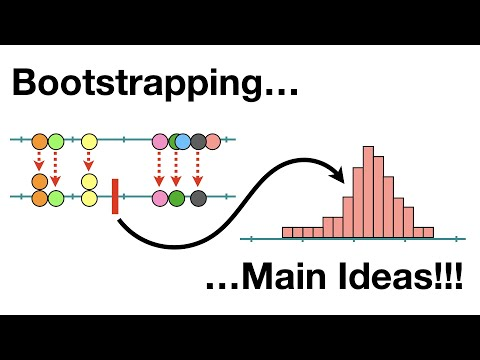

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

1. Standard error of the mean (SEM) is the standard deviation of the bootstrapped samples. The SEM measures variabilty between samples, instead of variability between data points, which is what the standard deviation of the original data does. 

6. 
1.Bootstrapping is the process of taking your data and repeatedly taking samples from it. Each sample has the same sample size as the original data and datapoints are randomly taken with replacement(means that if you take a datapoint you can take it again). You can create a distribution with the bootstrapped samples to see the variance between samples

2.The main purpose of bootstrapping is to find how much variability is in your data without needing a large sample size.

3.You could use your bootstrapped samples to create a confidence interval. Choose the confidence % as 95 for example. If your hypothesized mean falls outside the interval, the true mean is unlikely to be that value.

8. Our hypothesis is that the vaccine has a positive effect on health score, so our null hypothesis is that the vaccine has no effect. 

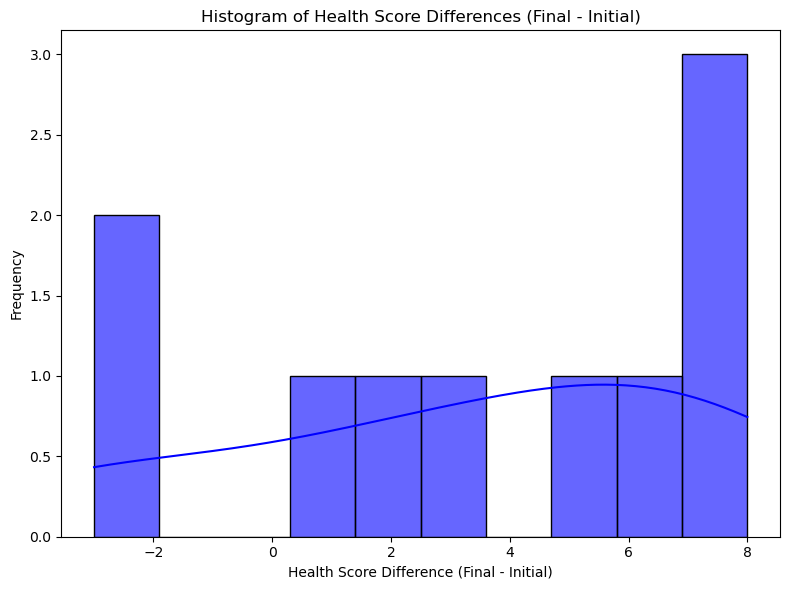

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

# Load the data from the CSV file
data = """PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
1,45,M,84,86
2,34,F,78,86
3,29,M,83,80
4,52,F,81,86
5,37,M,81,84
6,41,F,80,86
7,33,M,79,86
8,48,F,85,82
9,26,M,76,83
10,39,F,83,84"""

# Create a DataFrame from the CSV data
df = pd.read_csv(StringIO(data))

# Calculate the difference between Final and Initial Health Scores
df['HealthScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Set the figure size for the histogram
plt.figure(figsize=(8, 6))

# Plot histogram for Health Score Differences
sns.histplot(df['HealthScoreDifference'], bins=10, kde=True, color='blue', alpha=0.6)
plt.title('Histogram of Health Score Differences (Final - Initial)')
plt.xlabel('Health Score Difference (Final - Initial)')
plt.ylabel('Frequency')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('health_score_difference_histogram.png')

# Show the plot
plt.show()



Original Mean Health Score Difference: 3.30
99% Confidence Interval for Health Score Difference: (0.20, 6.30)


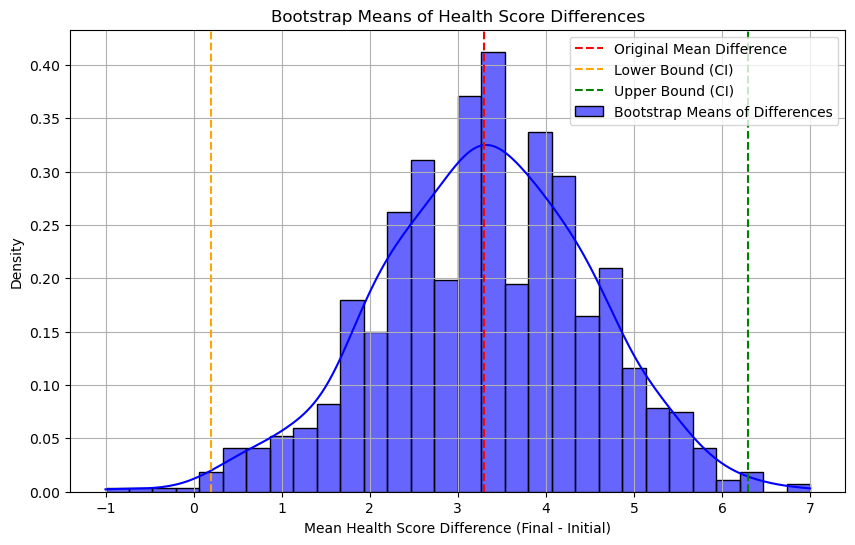

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
data = """PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
1,45,M,84,86
2,34,F,78,86
3,29,M,83,80
4,52,F,81,86
5,37,M,81,84
6,41,F,80,86
7,33,M,79,86
8,48,F,85,82
9,26,M,76,83
10,39,F,83,84"""

# Create a DataFrame from the CSV data
from io import StringIO
df = pd.read_csv(StringIO(data))

# Calculate the difference between Final and Initial Health Scores
df['HealthScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Set the number of bootstrap samples and confidence level
num_samples = 1000
confidence_level = 0.99

# Initialize an array to hold the bootstrap means of differences
bootstrap_means_diff = []

# Perform bootstrapping on the differences
for _ in range(num_samples):
    # Generate a bootstrap sample of differences
    bootstrap_sample_diff = df['HealthScoreDifference'].sample(n=len(df), replace=True)
    # Calculate the mean of the bootstrap sample differences
    bootstrap_mean_diff = bootstrap_sample_diff.mean()
    bootstrap_means_diff.append(bootstrap_mean_diff)

# Calculate the confidence interval for the differences
lower_bound_diff = np.percentile(bootstrap_means_diff, (1 - confidence_level) / 2 * 100)
upper_bound_diff = np.percentile(bootstrap_means_diff, (1 + confidence_level) / 2 * 100)

# Output the results
mean_diff_of_sample = df['HealthScoreDifference'].mean()
print(f"Original Mean Health Score Difference: {mean_diff_of_sample:.2f}")
print(f"{confidence_level*100:.0f}% Confidence Interval for Health Score Difference: ({lower_bound_diff:.2f}, {upper_bound_diff:.2f})")

# Plotting the bootstrap means of differences
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_means_diff, bins=30, kde=True, color='blue', stat='density', label='Bootstrap Means of Differences', alpha=0.6)

# Plot the original mean difference
plt.axvline(mean_diff_of_sample, color='red', linestyle='--', label='Original Mean Difference')

# Plot the confidence interval
plt.axvline(lower_bound_diff, color='orange', linestyle='--', label='Lower Bound (CI)')
plt.axvline(upper_bound_diff, color='green', linestyle='--', label='Upper Bound (CI)')

# Adding labels and title
plt.title('Bootstrap Means of Health Score Differences')
plt.xlabel('Mean Health Score Difference (Final - Initial)')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()



Since 0 is outside the 99% confidence interval, we can conclude with 99% confidence that the vaccine does have an effect on healthscore. 

Sure! Here’s a summary of our chat session:

Summary of the Chat Session
Bootstrapping Purpose: You initially inquired about the purpose of bootstrapping and how it can be used to assess the plausibility of a hypothesized population average using a sample.

Confidence Intervals: We discussed confidence intervals, how they are calculated, and their importance in statistical analysis.

Deciding Confidence Percentage: You asked how to decide on the confidence percentage to use for statistical analyses.

Python Code for Bootstrapping: You requested Python code to bootstrap the health score differences from a given dataset, which was provided.

Visualization: You requested a graph of the bootstrapped data, which included histograms of the original health scores and health score differences, along with saving them as PNG files.

Statistical Conclusion: You inquired about the interpretation of a confidence interval that does not include zero, specifically in the context of concluding that a vaccine has an effect. We discussed how such a result indicates statistical significance, but further context is needed to claim causality.

Revised Statement: We crafted a more nuanced statement to accurately reflect the results of the analysis, emphasizing the distinction between statistical significance and causality.

Final Summary: You requested a summary of the chat session.

If you need any more details or have further questions, feel free to ask!

https://chatgpt.com/share/66fcea3e-4168-8013-90c7-b83de1d2ccd9